In [11]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Importar Seaborn para estilos adicionales

In [12]:
# Cargar el archivo CSV original 
datos_dimorfismo = pd.read_csv("clusters_rellenos.csv", sep=",")
datos_dimorfismo.head(3)

,Unnamed: 0,Cluster,ID,Expression
0,0,Cluster 0,1447868,"-6,80771127006372"
1,2,Cluster 1,1362638,"-1,86863503"
2,4,Cluster 2,1452460,"-2,115388997"


Se utiliza la función loc para asignar valores a la columna "Morfologia" según las condiciones:

    Si el valor en la columna "Expression" es mayor que 0, se asigna "Yeast".

    Si el valor en la columna "Expression" es menor que 0, se asigna "Mycelium".

    Si el valor en la columna "Expression" es igual a 0, se asigna "Not_differencial".

In [13]:
#Comprobar si hay valores nulos. 
datos_dimorfismo['Expression'] = datos_dimorfismo['Expression'].str.replace(',', '.')
if datos_dimorfismo['Expression'].isnull().any():
    print('Existen valores no numéricos en la columna "Expression".')

# Convertir a tipo float o decimal si es necesario
if datos_dimorfismo['Expression'].dtype != 'float64':
    datos_dimorfismo['Expression'] = datos_dimorfismo['Expression'].astype('float64')

# Crear columna "Morfologia" y rellenarla según los valores de Expression
datos_dimorfismo['Morfologia'] = ''
datos_dimorfismo.loc[datos_dimorfismo["Expression"] > 0, "Morfologia"] = "Levadura"
datos_dimorfismo.loc[datos_dimorfismo["Expression"] < 0, "Morfologia"] = "Micelio"
datos_dimorfismo.loc[datos_dimorfismo["Expression"] == 0, "Morfologia"] = "No diferencial"

# Mostrar el resultado
print(datos_dimorfismo)


       Unnamed: 0       Cluster       ID  Expression Morfologia
0               0     Cluster 0  1447868   -6.807711    Micelio
1               2     Cluster 1  1362638   -1.868635    Micelio
2               4     Cluster 2  1452460   -2.115389    Micelio
3               6     Cluster 3  1342161   -7.974664    Micelio
4               8     Cluster 4  1354593    3.780186   Levadura
...           ...           ...      ...         ...        ...
11611       20586  Cluster 8975  1534011    3.016585   Levadura
11612       20588  Cluster 8976  1545638   -4.563361    Micelio
11613       20590  Cluster 8977  1536429    6.146176   Levadura
11614       20592  Cluster 8978  1552904    2.741254   Levadura
11615       20594  Cluster 8979  1437129   -1.130333    Micelio

[11616 rows x 5 columns]


In [117]:
datos_dimorfismo[datos_dimorfismo[ "Morfologia"] == "Not_differential"]

,Unnamed: 0,Cluster,ID,Expression,Morfologia
6,11,Cluster 5,1598183,0.0,Not_differential
10,18,Cluster 8,1357100,0.0,Not_differential
18,33,Cluster 15,1509783,0.0,Not_differential
22,41,Cluster 19,1347049,0.0,Not_differential
24,45,Cluster 21,1450080,0.0,Not_differential
...,...,...,...,...,...
11596,20558,Cluster 8962,1483783,0.0,Not_differential
11597,20560,Cluster 8963,1508277,0.0,Not_differential
11600,20565,Cluster 8965,1467340,0.0,Not_differential
11608,20580,Cluster 8972,1435844,0.0,Not_differential


In [14]:
#Guardar los datos de los genes con la morfología donde se expresan
datos_dimorfismo.to_csv("clusters_con_morfologia2.csv")

Determinación del número de clusters totales y únicos. Entre estos clusters, hay algunos que tienen una sola proteína y por tanto no son clusters reales y no se usarán en los siguientes análisis. Para poder identificar los clusters reales:
    - se determinó el número de proteínas que hay en cada cluster.
    - se seleccionaron los clusters con al menos dos proteínas. 

In [22]:
# Numero de clusters únicos
print("Número de clusters únicos en los datos originales:")
print(datos_dimorfismo["Cluster"].nunique())

# La longitud del dataframe indica el número de genes totales
print("El número de genes totales en estos clusters es de:")
print(len(datos_dimorfismo))

Número de clusters únicos en los datos originales:
8980
El número de genes totales en estos clusters es de:
11616


In [23]:
# Añadir una columna "Proteina" con prefijo "Mucci_"
datos_dimorfismo['Protein'] = 'Mucci_' + datos_dimorfismo['ID'].astype(str)
# Mostrar el DataFrame resultante
print(datos_dimorfismo)

       Unnamed: 0.1  Unnamed: 0       Cluster       ID  Expression Morfologia  \
0                 0           0     Cluster 0  1447868   -6.807711    Micelio   
1                 1           2     Cluster 1  1362638   -1.868635    Micelio   
2                 2           4     Cluster 2  1452460   -2.115389    Micelio   
3                 3           6     Cluster 3  1342161   -7.974664    Micelio   
4                 4           8     Cluster 4  1354593    3.780186   Levadura   
...             ...         ...           ...      ...         ...        ...   
11611         11611       20586  Cluster 8975  1534011    3.016585   Levadura   
11612         11612       20588  Cluster 8976  1545638   -4.563361    Micelio   
11613         11613       20590  Cluster 8977  1536429    6.146176   Levadura   
11614         11614       20592  Cluster 8978  1552904    2.741254   Levadura   
11615         11615       20594  Cluster 8979  1437129   -1.130333    Micelio   

             Protein  
0   

In [24]:
# Se calcula el número de proteínas en el cluster para cada fila
datos_dimorfismo["NumberProteins"] = datos_dimorfismo.groupby('Cluster')["ID"].transform(lambda x: x.nunique())
datos_dimorfismo.head(3)

,Unnamed: 0.1,Unnamed: 0,Cluster,ID,Expression,Morfologia,Protein,NumberProteins
0,0,0,Cluster 0,1447868,-6.807711,Micelio,Mucci_1447868,1
1,1,2,Cluster 1,1362638,-1.868635,Micelio,Mucci_1362638,1
2,2,4,Cluster 2,1452460,-2.115389,Micelio,Mucci_1452460,1


In [101]:
#Guardar los datos de los genes con la morfología donde se expresan
datos_dimorfismo.to_csv("clusters_con_morfologia2.csv")

En el código inferior, se está filtrando para obtener sólo los clusters con al menos dos proteínas. 

In [25]:
df_cluster_2p = datos_dimorfismo[datos_dimorfismo["NumberProteins"] >= 2]

# Imprimimos el DataFrame resultante
df_cluster_2p.head(3)

,Unnamed: 0.1,Unnamed: 0,Cluster,ID,Expression,Morfologia,Protein,NumberProteins
4,4,8,Cluster 4,1354593,3.780186,Levadura,Mucci_1354593,2
5,5,9,Cluster 4,1446136,-1.234239,Micelio,Mucci_1446136,2
8,8,15,Cluster 7,1325087,-1.686823,Micelio,Mucci_1325087,2


In [26]:
# determinación de los clusters únicos al aplicar el filtro de al menos dos proteínas por cluster.
print("Número de clusters únicos que tienen al menos dos proteínas:")
print(df_cluster_2p["Cluster"].nunique())

# La longitud del dataframe indica el número de genes totales
print("El número de genes totales en estos clusters es de:")
print(len(df_cluster_2p))

Número de clusters únicos que tienen al menos dos proteínas:
1602
El número de genes totales en estos clusters es de:
4238


Como resultado se obtiene que hay 1602 clusters reales o con al menos dos proteínas. 

Representación de los clusters y el número de proteínas que contienen. Se puede ver que la mayoría contienen dos o tres proteínas. 

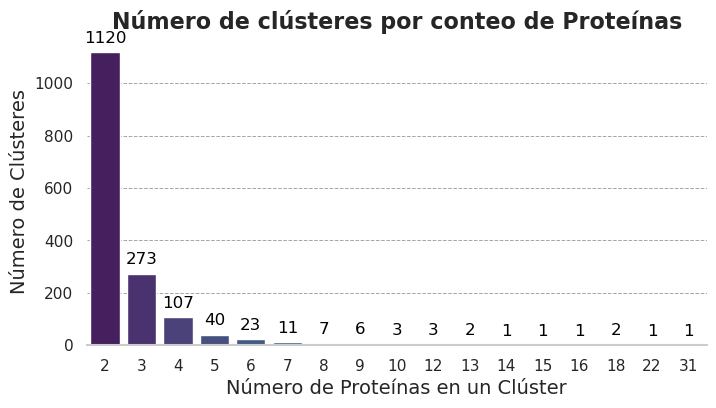

In [27]:
# Contar el número de clusters por cantidad de proteínas
clusters_por_cantidad_proteinas = df_cluster_2p.groupby('NumberProteins')['Cluster'].nunique()

# Establecer el estilo de Seaborn para mejorar la apariencia del gráfico
sns.set(style="whitegrid", palette="viridis")

# Crear un gráfico de barras con Seaborn
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=clusters_por_cantidad_proteinas.index, y=clusters_por_cantidad_proteinas.values, palette="viridis")

#Etiquetas en inglés
# Añadir título y etiquetas (en inglés)
#plt.title('Number of Clusters per Protein Count', fontsize=12, weight='bold')
#plt.xlabel('Number of Proteins in a Cluster', fontsize=10)
#plt.ylabel('Number of Clusters', fontsize=10)

#Etiquetas en español
# Añadir título y etiquetas (en inglés)
plt.title('Número de clústeres por conteo de Proteínas', fontsize=16, weight='bold')
plt.xlabel('Número de Proteínas en un Clúster', fontsize=14)
plt.ylabel('Número de Clústeres', fontsize=14)

# Añadir etiquetas en las barras (enteros)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

# Ajustes estéticos adicionales
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=1.5)
ax.yaxis.set_tick_params(width=1.5)
ax.yaxis.grid(True, linestyle='--', which='both', color='gray', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)

# Guardar la imagen como SVG
plt.savefig('clusterspor_prot.svg', format='svg', bbox_inches='tight', transparent=True)

# Mostrar el gráfico
plt.show()


El siguiente filtro que se va a hacer es para eliminar los genes que no están diferencialmente expresados, que son los genes constitutivos. 
Esto va a generar clusters con menos de dos proteínas, por tanto, estos también se exluirán de los posteriores análisis. 

In [28]:
df_cluster_notDif=df_cluster_2p[df_cluster_2p["Morfologia"] == "No diferencial"]
df_cluster_notDif.head(3)

,Unnamed: 0.1,Unnamed: 0,Cluster,ID,Expression,Morfologia,Protein,NumberProteins
18,18,33,Cluster 15,1509783,0.0,No diferencial,Mucci_1509783,2
32,32,59,Cluster 27,1584338,0.0,No diferencial,Mucci_1584338,3
81,81,146,Cluster 65,1532958,0.0,No diferencial,Mucci_1532958,2


In [29]:
# determinación de los clusters únicos al aplicar el filtro de los genes no diferencialmente expresados.
print("Número de clusters únicos cuyos genes no están diferencialmente expresados:")
print(df_cluster_notDif["Cluster"].nunique())

# La longitud del dataframe indica el número de genes totales
print("El número de genes totales en estos clusters es de:")
print(len(df_cluster_notDif))

Número de clusters únicos cuyos genes no están diferencialmente expresados:
516
El número de genes totales en estos clusters es de:
784


El siguiente filtro que se va a hacer es para encontrar los genes que están diferencialmente expresados entre las dos morfologías.

In [30]:
df_cluster_diff=df_cluster_2p[df_cluster_2p["Morfologia"] != "No diferencial"]
df_cluster_diff

,Unnamed: 0.1,Unnamed: 0,Cluster,ID,Expression,Morfologia,Protein,NumberProteins
4,4,8,Cluster 4,1354593,3.780186,Levadura,Mucci_1354593,2
5,5,9,Cluster 4,1446136,-1.234239,Micelio,Mucci_1446136,2
8,8,15,Cluster 7,1325087,-1.686823,Micelio,Mucci_1325087,2
9,9,16,Cluster 7,1447902,-2.025630,Micelio,Mucci_1447902,2
17,17,32,Cluster 15,1450694,-1.559622,Micelio,Mucci_1450694,2
...,...,...,...,...,...,...,...,...
11565,11565,20503,Cluster 8938,1532156,2.146252,Levadura,Mucci_1532156,3
11566,11566,20504,Cluster 8938,1558964,-1.347770,Micelio,Mucci_1558964,3
11586,11586,20539,Cluster 8953,1535026,4.598611,Levadura,Mucci_1535026,5
11599,11599,20564,Cluster 8965,1463117,1.991285,Levadura,Mucci_1463117,3


In [34]:
# determinación de los clusters únicos al aplicar el filtro de los genes diferencialmente expresados.
print("Número de clusters únicos cuyos genes están diferencialmente expresados:")
print(df_cluster_diff["Cluster"].nunique())

# La longitud del dataframe indica el número de genes totales
print("El número de genes totales en estos clusters es de:")
print(len(df_cluster_diff))

Número de clusters únicos cuyos genes están diferencialmente expresados:
1513
El número de genes totales en estos clusters es de:
3454


Al aplicar los filtros anteriores, hay clusters que pasan a tener menos de dos proteínas. Estos clusters se excluirán de los análisis posteriores. 
En el código inferior, se vuelve a contar el número de proteínas por clusters (tras eliminar los genes no difrencialmente expresados).  

In [35]:
# Calcular el número de proteínas en el cluster para cada fila
df_cluster_diff_numprot = df_cluster_diff
df_cluster_diff_numprot.loc[:, "NumberProteins_filtered"] = df_cluster_diff_numprot.groupby('Cluster')["ID"].transform(lambda x: x.nunique())
df_cluster_diff_numprot

,Unnamed: 0.1,Unnamed: 0,Cluster,ID,Expression,Morfologia,Protein,NumberProteins,NumberProteins_filtered
4,4,8,Cluster 4,1354593,3.780186,Levadura,Mucci_1354593,2,2
5,5,9,Cluster 4,1446136,-1.234239,Micelio,Mucci_1446136,2,2
8,8,15,Cluster 7,1325087,-1.686823,Micelio,Mucci_1325087,2,2
9,9,16,Cluster 7,1447902,-2.025630,Micelio,Mucci_1447902,2,2
17,17,32,Cluster 15,1450694,-1.559622,Micelio,Mucci_1450694,2,1
...,...,...,...,...,...,...,...,...,...
11565,11565,20503,Cluster 8938,1532156,2.146252,Levadura,Mucci_1532156,3,3
11566,11566,20504,Cluster 8938,1558964,-1.347770,Micelio,Mucci_1558964,3,3
11586,11586,20539,Cluster 8953,1535026,4.598611,Levadura,Mucci_1535026,5,1
11599,11599,20564,Cluster 8965,1463117,1.991285,Levadura,Mucci_1463117,3,2


In [36]:
clusters_diff_2prot_ML_con_not_diff = df_cluster_diff_numprot[df_cluster_diff_numprot["NumberProteins_filtered"] ==1]

# determinación de los clusters únicos al aplicar el filtro del número de proteínas.
print("Número de clusters únicos que contienen menos de dos proteínas tras eliminar los genes not_diff:")
print(clusters_diff_2prot_ML_con_not_diff["Cluster"].nunique())

# La longitud del dataframe indica el número de genes totales
print("El número de genes totales en estos clusters es de:")
print(len(clusters_diff_2prot_ML_con_not_diff))
# estos genes forman clusters con genes no diferencialmente expresados.

Número de clusters únicos que contienen menos de dos proteínas tras eliminar los genes not_diff:
284
El número de genes totales en estos clusters es de:
284


En el siguiente código se va a analizar cuántos de estos son genes de levadura y cuántos son de micelio (esto es analizar los genes de micelio y levadura que forman clusters con genes not_diff)

In [37]:
print("el número de proteínas de levadura que formaba clusters con genes not_diff es:")
print(len(clusters_diff_2prot_ML_con_not_diff[clusters_diff_2prot_ML_con_not_diff["Morfologia"]=="Levadura"]))

print("el número de proteínas de micelio que formaba clusters con genes not_diff es:")
print(len(clusters_diff_2prot_ML_con_not_diff[clusters_diff_2prot_ML_con_not_diff["Morfologia"]=="Micelio"]))

el número de proteínas de levadura que formaba clusters con genes not_diff es:
143
el número de proteínas de micelio que formaba clusters con genes not_diff es:
141


De nuevo se va a aplicar el filtro para obtener los clusters con al menos dos proteínas para obtener los clusters reales cuyos genes están diferencialmente expresados.

In [38]:
df_cluster_diff_2p = df_cluster_diff_numprot[df_cluster_diff_numprot["NumberProteins_filtered"] >= 2]

# Imprimimos el DataFrame resultante
df_cluster_diff_2p

,Unnamed: 0.1,Unnamed: 0,Cluster,ID,Expression,Morfologia,Protein,NumberProteins,NumberProteins_filtered
4,4,8,Cluster 4,1354593,3.780186,Levadura,Mucci_1354593,2,2
5,5,9,Cluster 4,1446136,-1.234239,Micelio,Mucci_1446136,2,2
8,8,15,Cluster 7,1325087,-1.686823,Micelio,Mucci_1325087,2,2
9,9,16,Cluster 7,1447902,-2.025630,Micelio,Mucci_1447902,2,2
30,30,57,Cluster 27,1350558,2.609232,Levadura,Mucci_1350558,3,2
...,...,...,...,...,...,...,...,...,...
11564,11564,20502,Cluster 8938,1485660,-6.384932,Micelio,Mucci_1485660,3,3
11565,11565,20503,Cluster 8938,1532156,2.146252,Levadura,Mucci_1532156,3,3
11566,11566,20504,Cluster 8938,1558964,-1.347770,Micelio,Mucci_1558964,3,3
11599,11599,20564,Cluster 8965,1463117,1.991285,Levadura,Mucci_1463117,3,2


In [39]:
# determinación de los clusters únicos al aplicar el filtro de los genes diferencialmente expresados.
print("Número de clusters únicos cuyos genes están diferencialmente expresados y con al menos dos proteínas:")
print(df_cluster_diff_2p["Cluster"].nunique())

# La longitud del dataframe indica el número de genes totales
print("El número de genes totales en estos clusters es de:")
print(len(df_cluster_diff_2p))

Número de clusters únicos cuyos genes están diferencialmente expresados y con al menos dos proteínas:
1229
El número de genes totales en estos clusters es de:
3170


En el siguiente filtro se van a obtener los clusters que contienen al menos un gen de levadura y al menos uno de micelio.
- Los clusters que contienen sólo genes de levadura.
- Los clusters que contienen sólo genes de micelio. 

In [40]:
# Obtener los clusters que contienen genes de levadura
clusters_levadura = df_cluster_diff_2p[df_cluster_diff_2p["Morfologia"] == "Levadura"]["Cluster"]
print("El número de genes de levadura en los clusters con al menos dos proteínas tras los filtros de diff y clusters con >=2 proteínas es:")
print(len(clusters_levadura))

# Obtener los clusters que contienen genes de micelio
clusters_micelio = df_cluster_diff_2p[df_cluster_diff_2p["Morfologia"] == "Micelio"]["Cluster"]
print("El número de genes de micelio en los clusters con al menos dos proteínas tras los filtros de diff y clusters con >=2 proteínas es:")
print(len(clusters_micelio))

# Encontrar la intersección de los conjuntos
clusters_conjuntos = set(clusters_levadura) & set(clusters_micelio)

# Filtrar el DataFrame original para mantener solo los clusters con genes de levadura y micelio simultáneamente
clusters_diff_ambas = df_cluster_diff_2p[df_cluster_diff_2p["Cluster"].isin(clusters_conjuntos)]
print("El número de clusters con al menos un gen de lavadura y uno de micelio es:")
print(clusters_diff_ambas["Cluster"].nunique())

print("El número de genes en los clusters con al menos un gen de lavadura y uno de micelio es:")
print(len(clusters_micelio))

# Guardar el Dataframe que contiene clusters con al menos un gen de lavadura y al menos uno de micelio. Estos son los clusters dimórficos.
clusters_diff_ambas.to_csv("clusters_dimorficos.csv")

El número de genes de levadura en los clusters con al menos dos proteínas tras los filtros de diff y clusters con >=2 proteínas es:
1445
El número de genes de micelio en los clusters con al menos dos proteínas tras los filtros de diff y clusters con >=2 proteínas es:
1725
El número de clusters con al menos un gen de lavadura y uno de micelio es:
595
El número de genes en los clusters con al menos un gen de lavadura y uno de micelio es:
1725


In [41]:
# Obtener los clusters que contienen genes de levadura pero no están en la intersección con los clusters de micelio
clusters_levadura_sin_interseccion = set(clusters_levadura) - clusters_conjuntos

# Filtrar el DataFrame original para mantener solo los clusters con genes de levadura sin intersección con los clusters de micelio
clusters_diff_solo_levadura = df_cluster_diff_2p[df_cluster_diff_2p["Cluster"].isin(clusters_levadura_sin_interseccion)]


print("Número de clusters que sólo contienen genes de levadura:")
print(clusters_diff_solo_levadura["Cluster"].nunique())

print("Número de genes en los clusters que sólo contienen genes de levadura:")
print(len(clusters_diff_solo_levadura))

Número de clusters que sólo contienen genes de levadura:
272
Número de genes en los clusters que sólo contienen genes de levadura:
621


In [42]:
clusters_diff_solo_levadura.to_csv("clusters_diff_solo_levadura.csv")

In [43]:
# Obtener los clusters que contienen genes de micelio pero no están en la intersección con los clusters de levadura
clusters_micelio_sin_interseccion = set(clusters_micelio) - clusters_conjuntos

# Filtrar el DataFrame original para mantener solo los clusters con genes de micelio sin intersección con los clusters de levadura
clusters_diff_solo_micelio = df_cluster_diff_2p[df_cluster_diff_2p["Cluster"].isin(clusters_micelio_sin_interseccion)]

print("Número de clusters que sólo contienen genes de micelio:")
print(clusters_diff_solo_micelio["Cluster"].nunique())

print("Número de genes en los clusters que sólo contienen genes de micelio:")
print(len(clusters_diff_solo_micelio))

Número de clusters que sólo contienen genes de micelio:
362
Número de genes en los clusters que sólo contienen genes de micelio:
819


In [44]:
clusters_diff_solo_micelio.to_csv("clusters_diff_solo_micelio.csv")

**Graficos**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar los datos
datos_dimorfismo = pd.read_csv("clusters_con_morfologia2.csv")

# Verificar las primeras filas del DataFrame
print(datos_dimorfismo.head())

# Verificar la cantidad de datos por grupo de morfología
print(datos_dimorfismo["Morfologia"].value_counts())

# Cerrar todas las figuras abiertas y usar el estilo por defecto
plt.close('all')
plt.style.use('default')

# Seleccionar las columnas necesarias
datos = datos_dimorfismo[["Cluster", "Expression", "Morfologia"]]

# Definir los colores para cada combinación de morfología
colores = {
    "Levadura": "red",
    "Micelio": "blue",
    "No diferencial": "green",
    "Levadura & Micelio": "purple",
    "Levadura & No diferencial": "#FF8C00",  # Dark orange
    "Micelio & No diferencial": "#008B8B",  # Dark cyan
    "Levadura & Micelio & No diferencial": "navy"  # Navy (azul marino)"magenta"
}

# Agrupar los datos por cluster
agrupado_por_cluster = datos.groupby("Cluster")

# Crear un diccionario para almacenar las expresiones de cada combinación
expresion_por_combinacion = {
    "Levadura": [],
    "Micelio": [],
    "No diferencial": [],
    "Levadura & Micelio": [],
    "Levadura & No diferencial": [],
    "Micelio & No diferencial": [],
    "Levadura & Micelio & No diferencial": []
}

# Crear una lista para las etiquetas de los clústeres
etiquetas_clusters = []

# Crear un diccionario para almacenar la expresión y el clúster asociado
expresion_y_cluster = {key: ([], []) for key in expresion_por_combinacion.keys()}

# Recorrer cada grupo de clústeres
for cluster, datos_grupo in agrupado_por_cluster:
    # Obtener las morfologías presentes en el clúster
    morfologias = datos_grupo["Morfologia"].unique()
    morfologias = sorted(morfologias)  # Ordenar para asegurar la consistencia
    
    # Crear la etiqueta de la combinación de morfologías
    combinacion = " & ".join(morfologias)
    
    # Añadir la etiqueta del clúster a la lista
    etiquetas_clusters.append(cluster)
    
    # Obtener la expresión génica para el grupo actual
    expresion_genes = datos_grupo["Expression"].to_list()
    
    # Almacenar las expresiones y los clústeres en el diccionario correspondiente
    if combinacion in expresion_y_cluster:
        expresion_y_cluster[combinacion][0].extend(expresion_genes)
        expresion_y_cluster[combinacion][1].extend([cluster] * len(expresion_genes))
    else:
        expresion_y_cluster[combinacion] = (expresion_genes, [cluster] * len(expresion_genes))



# Crear un diagrama de dispersión para cada combinación
for combinacion, (expresiones, clusters) in expresion_y_cluster.items():
    color = colores.get(combinacion, "black")  # Obtener el color o usar negro por defecto si no está definido
    ax.scatter(clusters, expresiones, label=combinacion, color=color, alpha=0.6)
# Definir el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 4))
# Añadir título y etiquetas (en inglés)
#plt.title('Differential expression analysis', fontsize=16, weight='bold')
plt.title('Análisis de Expresión Diferencial', fontsize=16, weight='bold')
ax.set_xlabel("Clústeres", fontsize=14)
ax.set_xticks(range(len(etiquetas_clusters)))  # Establecer las etiquetas de los clusters
ax.set_xticklabels(etiquetas_clusters, rotation=90)  # Añadir las etiquetas de los ticks
ax.set_xticklabels([])  # Eliminar las etiquetas de los ticks
ax.set_ylabel("Expresión (log2FC)", fontsize=14)

# Establecer el color de fondo de la figura y de los ejes
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Personalizar la leyenda dentro del grafico 
#handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colores.get(morf, 'black'), markersize=10) for morf in expresion_y_cluster.keys()]
#labels = list(expresion_y_cluster.keys())
#leyenda = ax.legend(handles, labels, fontsize=12, loc='best')
# Personalizar la leyenda fuera del grafico
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colores.get(morf, 'black'), markersize=10) for morf in expresion_y_cluster.keys()]
labels = list(expresion_y_cluster.keys())
leyenda = ax.legend(handles, labels, fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Guardar la imagen como SVG
plt.savefig('clus_vs_expr_all.svg', format='svg', facecolor='white', edgecolor='none', bbox_inches='tight')

# Mostrar la figura
plt.show()


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


   Unnamed: 0.1  Unnamed: 0    Cluster       ID  Expression Morfologia
0             0           0  Cluster 0  1447868   -6.807711    Micelio
1             1           2  Cluster 1  1362638   -1.868635    Micelio
2             2           4  Cluster 2  1452460   -2.115389    Micelio
3             3           6  Cluster 3  1342161   -7.974664    Micelio
4             4           8  Cluster 4  1354593    3.780186   Levadura
Morfologia
Micelio           5159
Levadura          3988
No diferencial    2469
Name: count, dtype: int64


NameError: name 'ax' is not defined

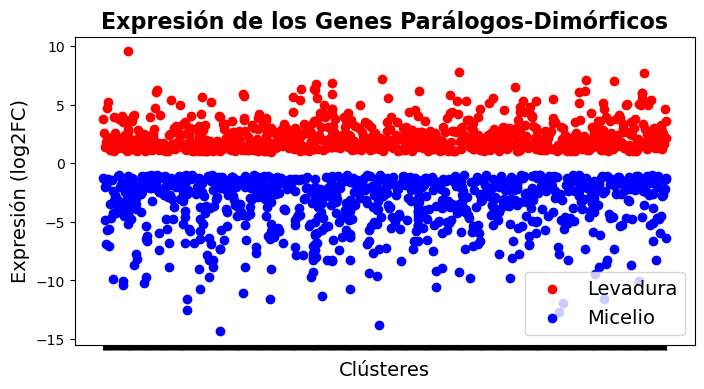

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
# Reiniciar Matplotlib (a veces el fondo aparece gris y reinciando se soluciona)
plt.close('all')
plt.style.use('default')

# Cargar los datos desde el archivo CSV
clusters_diff_ambas = pd.read_csv("clusters_dimorficos.csv")

# Seleccionar las columnas
datos = clusters_diff_ambas[["Cluster", "Expression", "Morfologia"]]

# Agrupar los datos por Morfologia
agrupado_por_morfologia = datos.groupby("Morfologia")

# Definir el tamaño de la figura y el color de fondo
fig, ax = plt.subplots(figsize=(8, 4))

# Definir los colores para cada morfología
colores = {
    "Levadura": "red",
    "Micelio": "blue",
    "No diferencial": "green"
}

# Recorrer cada grupo de morfología
for morfologia, datos_grupo in agrupado_por_morfologia:
    # Obtener los clusters y la expresión génica para el grupo actual
    clusters = datos_grupo["Cluster"].to_list()
    expresion_genes = datos_grupo["Expression"].to_list()

    # Crear un diagrama de dispersión para el grupo actual
    ax.scatter(clusters, expresion_genes, label=morfologia, color=colores[morfologia])
# Añadir título y etiquetas (en inglés)
#plt.title('Expression of the Paralogs-Dimorphic genes', fontsize=12, weight='bold')
#ax.set_xlabel("Clusters", fontsize=10)
#ax.set_xticklabels([])  # Eliminar las etiquetas de los ticks
#ax.set_ylabel("Expression", fontsize=10)

# Añadir título y etiquetas (en español)
#plt.title('Expression of the Paralogs-Dimorphic genes', fontsize=12, weight='bold')
plt.title('Expresión de los Genes Parálogos-Dimórficos', fontsize=16, weight='bold')
ax.set_xlabel("Clústeres", fontsize=14)
ax.set_xticklabels([])  # Eliminar las etiquetas de los ticks
ax.set_ylabel("Expresión (log2FC)", fontsize=14)
# Establecer el color de fondo de la figura y de los ejes
fig.patch.set_facecolor('white')
ax.set_facecolor('white')


# Personalizar la leyenda

# Personalizar la leyenda
leyenda = ax.legend(fontsize=14, loc='best')

# Guardar la imagen como SVG
plt.savefig('clus_vs_expr_dim.svg', format='svg',  facecolor='white', edgecolor='none')

# Mostrar la figura
plt.show()




**Datos para el gráfico circular de la organización del genoma**

In [69]:
# Filtrar el dataframe para obtener los genes sobrexpresados en levadura o en micelio
datos_filtrados = datos_dimorfismo[(datos_dimorfismo["Morfologia"] == "Levadura") | (datos_dimorfismo["Morfologia"] == "Micelio")]
datos_filtrados



,Unnamed: 0,Cluster,ID,Expression,Morfologia
0,0,Cluster 0,1447868,-6.807711,Micelio
1,2,Cluster 1,1362638,-1.868635,Micelio
2,4,Cluster 2,1452460,-2.115389,Micelio
3,6,Cluster 3,1342161,-7.974664,Micelio
4,8,Cluster 4,1354593,3.780186,Levadura
...,...,...,...,...,...
11611,20586,Cluster 8975,1534011,3.016585,Levadura
11612,20588,Cluster 8976,1545638,-4.563361,Micelio
11613,20590,Cluster 8977,1536429,6.146176,Levadura
11614,20592,Cluster 8978,1552904,2.741254,Levadura


**Datos para los clusters que solo contienen genes de Levadura**

En el siguiente código lo que se pretende es buscar aquellos clusters que sólo contienen genes de levadura. Anteriormente se ha realizado un análisis parecido, sin embargo, algunos de esos clusters tienen también genes not_fiff.

In [73]:
# Obtener los clusters que contienen genes de levadura
clusters_yeast = datos_dimorfismo[datos_dimorfismo["Morfologia"] == "Levadura"]["Cluster"].unique()
print("El número de genes de levadura en los clusters con al menos dos proteínas tras los filtros de diff y clusters con >=2 proteínas es:")
print(len(clusters_yeast))

# Obtener los clusters que contienen genes de micelio
clusters_mycelium = datos_dimorfismo[datos_dimorfismo["Morfologia"] == "Micelio"]["Cluster"].unique()
print("El número de genes de micelio en los clusters con al menos dos proteínas tras los filtros de diff y clusters con >=2 proteínas es:")
print(len(clusters_mycelium))

# Obtener los clusters que contienen genes "Not_differential"
clusters_not_differential = datos_dimorfismo[datos_dimorfismo["Morfologia"] == "No diferencial"]["Cluster"].unique()
print("El número de genes 'Not_differential' en los clusters con al menos dos proteínas tras los filtros de diff y clusters con >=2 proteínas es:")
print(len(clusters_not_differential))

# Encontrar los clusters que contienen solo genes de levadura (excluyendo los que tienen genes de micelio y Not_differential)
clusters_only_yeast = set(clusters_yeast) - set(clusters_mycelium) - set(clusters_not_differential)

# Filtrar el DataFrame original para mantener solo los clusters que contienen únicamente genes de levadura
clusters_only_yeast_df = datos_dimorfismo[datos_dimorfismo["Cluster"].isin(clusters_only_yeast)]
print("El número de clusters con solo genes de levadura es:")
print(clusters_only_yeast_df["Cluster"].nunique())

print("El número de genes en los clusters con solo genes de levadura es:")
print(len(clusters_only_yeast_df))

# Guardar el Dataframe que contiene clusters con solo genes de lev
clusters_only_yeast_df.to_csv("clusters_only_yeast_df_all.csv")

El número de genes de levadura en los clusters con al menos dos proteínas tras los filtros de diff y clusters con >=2 proteínas es:
3410
El número de genes de micelio en los clusters con al menos dos proteínas tras los filtros de diff y clusters con >=2 proteínas es:
4391
El número de genes 'Not_differential' en los clusters con al menos dos proteínas tras los filtros de diff y clusters con >=2 proteínas es:
2201
El número de clusters con solo genes de levadura es:
2651
El número de genes en los clusters con solo genes de levadura es:
2974


In [110]:
# Obtener los clusters que contienen genes de Micelio
clusters_mic = datos_dimorfismo[datos_dimorfismo["Morfologia"] == "Mycelium"]["Cluster"].unique()
print("El número de genes de levadura en los clusters con al menos dos proteínas tras los filtros de diff y clusters con >=2 proteínas es:")
print(len(clusters_mic))

# Obtener los clusters que contienen genes de micelio
clusters_yeast = datos_dimorfismo[datos_dimorfismo["Morfologia"] == "Yeast"]["Cluster"].unique()
print("El número de genes de micelio en los clusters con al menos dos proteínas tras los filtros de diff y clusters con >=2 proteínas es:")
print(len(clusters_yeast))

# Obtener los clusters que contienen genes "Not_differential"
clusters_not_differential = datos_dimorfismo[datos_dimorfismo["Morfologia"] == "Not_differential"]["Cluster"].unique()
print("El número de genes 'Not_differential' en los clusters con al menos dos proteínas tras los filtros de diff y clusters con >=2 proteínas es:")
print(len(clusters_not_differential))

# Encontrar los clusters que contienen solo genes de levadura (excluyendo los que tienen genes de micelio y Not_differential)
clusters_only_mycelium = set(clusters_mic) - set(clusters_yeast) - set(clusters_not_differential)

# Filtrar el DataFrame original para mantener solo los clusters que contienen únicamente genes de levadura
clusters_only_mycelium_df = datos_dimorfismo[datos_dimorfismo["Cluster"].isin(clusters_only_mycelium)]
print("El número de clusters con solo genes de levadura es:")
print(clusters_only_mycelium_df["Cluster"].nunique())

print("El número de genes en los clusters con solo genes de micelio es:")
print(len(clusters_only_mycelium_df))

# Guardar el Dataframe que contiene clusters con solo genes de lev
clusters_only_mycelium_df.to_csv("clusters_only_mycelium_df_all.csv")

El número de genes de levadura en los clusters con al menos dos proteínas tras los filtros de diff y clusters con >=2 proteínas es:
4391
El número de genes de micelio en los clusters con al menos dos proteínas tras los filtros de diff y clusters con >=2 proteínas es:
3410
El número de genes 'Not_differential' en los clusters con al menos dos proteínas tras los filtros de diff y clusters con >=2 proteínas es:
2201
El número de clusters con solo genes de levadura es:
3626
El número de genes en los clusters con solo genes de micelio es:
4042


In [86]:
clusters_only_yeast_df

,Unnamed: 0,Cluster,ID,Expression,Morfologia,Protein,NumberProteins
11,20,Cluster 9,1562135,1.411270,Yeast,Mucci_1562135,1
16,30,Cluster 14,1474846,6.000343,Yeast,Mucci_1474846,1
19,35,Cluster 16,1142208,1.405570,Yeast,Mucci_1142208,1
26,49,Cluster 23,1053451,1.747954,Yeast,Mucci_1053451,1
37,68,Cluster 31,1584864,2.093875,Yeast,Mucci_1584864,1
...,...,...,...,...,...,...,...
11607,20578,Cluster 8971,1512507,1.098455,Yeast,Mucci_1512507,1
11610,20584,Cluster 8974,1502870,2.520073,Yeast,Mucci_1502870,1
11611,20586,Cluster 8975,1534011,3.016585,Yeast,Mucci_1534011,1
11613,20590,Cluster 8977,1536429,6.146176,Yeast,Mucci_1536429,1


In [71]:
# Obtener los clusters que contienen genes de levadura
clusters_yeast2p = df_cluster_2p[ df_cluster_2p["Morfologia"] == "Levadura"]["Cluster"].unique()
print("El número de genes de levadura en los clusters con al menos dos proteínas tras los filtros de diff y clusters con >=2 proteínas es:")
print(len(clusters_yeast2p))

# Obtener los clusters que contienen genes de micelio
clusters_mycelium2p = df_cluster_2p[df_cluster_2p["Morfologia"] == "Micelio"]["Cluster"].unique()
print("El número de genes de micelio en los clusters con al menos dos proteínas tras los filtros de diff y clusters con >=2 proteínas es:")
print(len(clusters_mycelium2p))

# Obtener los clusters que contienen genes "Not_differential"
clusters_not_differential2p =  df_cluster_2p[df_cluster_2p["Morfologia"] == "No diferencial"]["Cluster"].unique()
print("El número de genes 'Not_differential' en los clusters con al menos dos proteínas tras los filtros de diff y clusters con >=2 proteínas es:")
print(len(clusters_not_differential2p))

# Encontrar los clusters que contienen solo genes de levadura (excluyendo los que tienen genes de micelio y Not_differential)
clusters_only_yeast2p = set(clusters_yeast2p) - set(clusters_mycelium2p) - set(clusters_not_differential2p)

# Filtrar el DataFrame original para mantener solo los clusters que contienen únicamente genes de levadura
clusters_only_yeast_df2p = df_cluster_2p[df_cluster_2p["Cluster"].isin(clusters_only_yeast2p)]
print("El número de clusters con solo genes de levadura es:")
print(clusters_only_yeast_df2p["Cluster"].nunique())

print("El número de genes en los clusters con solo genes de levadura es:")
print(len(clusters_only_yeast_df2p))


# Guardar el Dataframe que contiene clusters con solo genes de lev
clusters_only_yeast_df2p.to_csv("clusters_only_yeast_df_2p.csv")

El número de genes de levadura en los clusters con al menos dos proteínas tras los filtros de diff y clusters con >=2 proteínas es:
1010
El número de genes de micelio en los clusters con al menos dos proteínas tras los filtros de diff y clusters con >=2 proteínas es:
1098
El número de genes 'Not_differential' en los clusters con al menos dos proteínas tras los filtros de diff y clusters con >=2 proteínas es:
516
El número de clusters con solo genes de levadura es:
251
El número de genes en los clusters con solo genes de levadura es:
574
